## Question: 
Calculate the relationship between stability within the health insurance system (use member months) and its relationship to chronic disease rate 

## Analysis: 
Logistic regression with binary coded chronic disease as the outcome of interest and independent variables that includes member months as one of the predictors controlling for demographic characteristics 

In [193]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [256]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy
from scipy.stats import spearmanr
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import warnings
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

In [190]:
med = pd.read_csv('../../data/reshaped_med.csv')

In [191]:
enroll = pd.read_csv('../../data/enroll.csv')

In [192]:
enroll.rename(columns={'Member ID Encrypted':'member_id'}, inplace=True)
enroll.rename(columns={'Incurred Year':'year'}, inplace=True)
enroll.rename(columns={'Total Medical Member Months':'month'}, inplace=True)
enroll.rename(columns={'Age':'age'}, inplace=True)
data = pd.merge(med, enroll, on=['member_id', 'year', 'age'], how='left')

In [301]:
#list(data)

In [164]:
a = data['month']

In [311]:
def regression(binary, claim):  
    plt.figure()
    check = sb.countplot(x=binary, data = data, palette = 'hls')
    plt.title('Check Counts')
    check
    print()
    b = data['age']
    x = np.column_stack((a,b))
    x[np.isnan(x)] = 0
    y = data[binary]
    
    #plt.figure()
    #sb.regplot(x='month', y='age', data=data, scatter=True)
    
    LogReg = LogisticRegression()
    LogReg.fit(scale(x), y)
    print("accuracy of regression is:", LogReg.score(scale(x), y))
    print()
    
    y_pred = LogReg.predict(scale(x))
    print(classification_report(y, y_pred))
    print("note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) ")
    
    print(confusion_matrix(y, y_pred))
    print("correct: 15965 + 92, incorrect: 86 + 3736")
    return;

### Check correlation between asthma and month


accuracy of regression is: 0.9459228331405001

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18804
           1       0.00      0.00      0.00      1075

   micro avg       0.95      0.95      0.95     19879
   macro avg       0.47      0.50      0.49     19879
weighted avg       0.89      0.95      0.92     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[18804     0]
 [ 1075     0]]
correct: 15965 + 92, incorrect: 86 + 3736


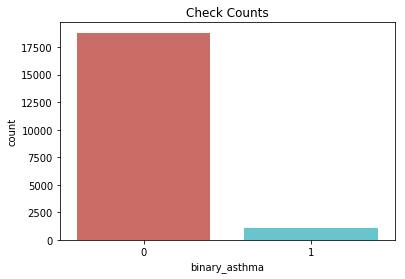

In [312]:
regression('binary_asthma', 'claims_asthma')

### Check correlation between bp and month


accuracy of regression is: 0.806630112178681

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     16051
           1       0.39      0.01      0.01      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.60      0.50      0.45     19879
weighted avg       0.73      0.81      0.72     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16008    43]
 [ 3801    27]]
correct: 15965 + 92, incorrect: 86 + 3736


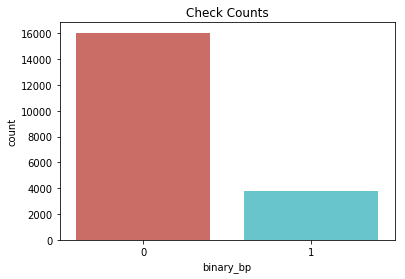

In [313]:
regression('binary_bp', 'claims_bp')

### Check correlation between cancer and month


accuracy of regression is: 0.9517078323859349

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     18919
           1       0.00      0.00      0.00       960

   micro avg       0.95      0.95      0.95     19879
   macro avg       0.48      0.50      0.49     19879
weighted avg       0.91      0.95      0.93     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[18919     0]
 [  960     0]]
correct: 15965 + 92, incorrect: 86 + 3736


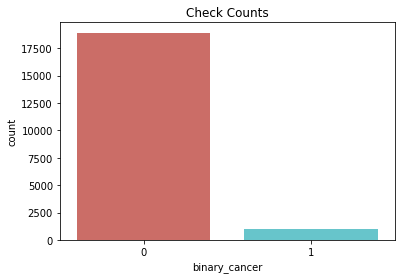

In [314]:
regression('binary_cancer', 'claims_cancer')

### Check correlation between cardiovascular and month


accuracy of regression is: 0.8301222395492731

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     16502
           1       0.00      0.00      0.00      3377

   micro avg       0.83      0.83      0.83     19879
   macro avg       0.42      0.50      0.45     19879
weighted avg       0.69      0.83      0.75     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16502     0]
 [ 3377     0]]
correct: 15965 + 92, incorrect: 86 + 3736


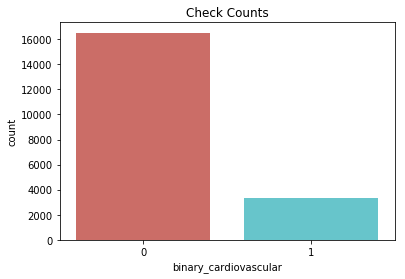

In [315]:
regression('binary_cardiovascular', 'claims_cardiovascular')

### Check correlation between cholesterol and month


accuracy of regression is: 0.8806277981789828

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17509
           1       0.38      0.00      0.00      2370

   micro avg       0.88      0.88      0.88     19879
   macro avg       0.63      0.50      0.47     19879
weighted avg       0.82      0.88      0.83     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[17501     8]
 [ 2365     5]]
correct: 15965 + 92, incorrect: 86 + 3736


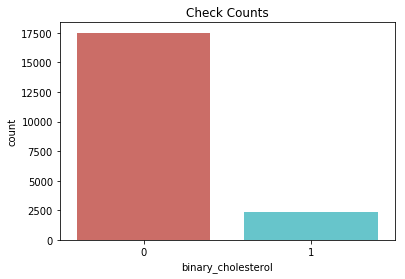

In [316]:
regression('binary_cholesterol', 'claims_cholesterol')

### Check correlation between copd and month


accuracy of regression is: 0.9648372654560089

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19180
           1       0.00      0.00      0.00       699

   micro avg       0.96      0.96      0.96     19879
   macro avg       0.48      0.50      0.49     19879
weighted avg       0.93      0.96      0.95     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[19180     0]
 [  699     0]]
correct: 15965 + 92, incorrect: 86 + 3736


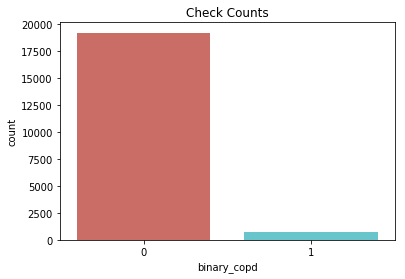

In [317]:
regression('binary_copd', 'claims_copd')

### Check correlation between diabetes and month


accuracy of regression is: 0.8585944967050656

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     17068
           1       0.00      0.00      0.00      2811

   micro avg       0.86      0.86      0.86     19879
   macro avg       0.43      0.50      0.46     19879
weighted avg       0.74      0.86      0.79     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[17068     0]
 [ 2811     0]]
correct: 15965 + 92, incorrect: 86 + 3736


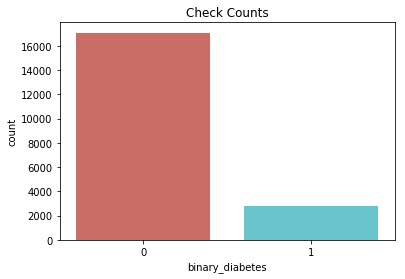

In [318]:
regression('binary_diabetes', 'claims_diabetes')

### Check correlation between kidney and month


accuracy of regression is: 0.9784697419387293

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19451
           1       0.00      0.00      0.00       428

   micro avg       0.98      0.98      0.98     19879
   macro avg       0.49      0.50      0.49     19879
weighted avg       0.96      0.98      0.97     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[19451     0]
 [  428     0]]
correct: 15965 + 92, incorrect: 86 + 3736


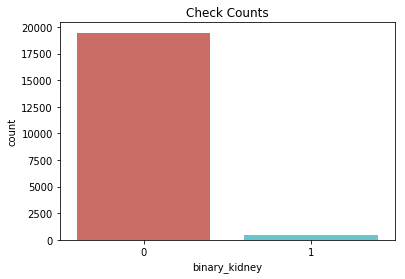

In [319]:
regression('binary_kidney', 'claims_kidney')

### Check correlation between mental_disorder and month


accuracy of regression is: 0.992504653151567

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19730
           1       0.00      0.00      0.00       149

   micro avg       0.99      0.99      0.99     19879
   macro avg       0.50      0.50      0.50     19879
weighted avg       0.99      0.99      0.99     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[19730     0]
 [  149     0]]
correct: 15965 + 92, incorrect: 86 + 3736


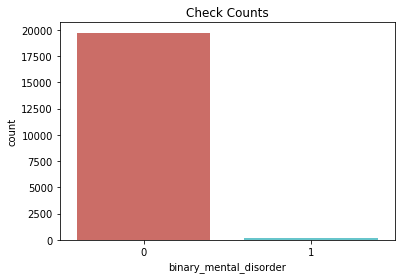

In [320]:
regression('binary_mental_disorder', 'claims_mental_disorder')

### Check correlation between musculoskeletal and month


accuracy of regression is: 0.9768600030182605

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19419
           1       0.00      0.00      0.00       460

   micro avg       0.98      0.98      0.98     19879
   macro avg       0.49      0.50      0.49     19879
weighted avg       0.95      0.98      0.97     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[19419     0]
 [  460     0]]
correct: 15965 + 92, incorrect: 86 + 3736


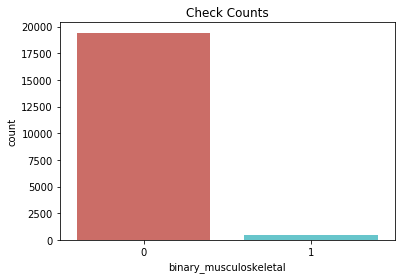

In [321]:
regression('binary_musculoskeletal', 'claims_musculoskeletal')

### Check correlation between obesity and month


accuracy of regression is: 0.919110619246441

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18271
           1       0.00      0.00      0.00      1608

   micro avg       0.92      0.92      0.92     19879
   macro avg       0.46      0.50      0.48     19879
weighted avg       0.84      0.92      0.88     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[18271     0]
 [ 1608     0]]
correct: 15965 + 92, incorrect: 86 + 3736


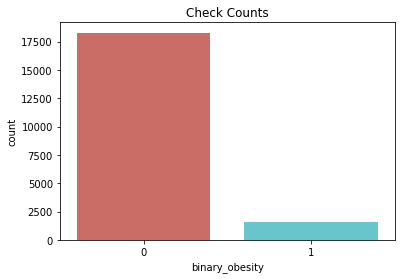

In [322]:
regression('binary_obesity', 'claims_obesity')